# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


In [88]:
for a in data:
    print '*' * 40
    print 'Feature :%12s' % a
    print 'Min     :%12.3f' % np.min(data[a])
    print 'Max     :%12.3f' % np.max(data[a])
    print 'Mean    :%12.3f' % np.mean(data[a])
    print 'Median  :%12.3f' % np.median(data[a])
    print 'Std     :%12.3f' % np.std(data[a], ddof=1) #ddof is for sample data
    print 'Var     :%12.3f' % np.var(data[a], ddof=1) #ddof is for sample data
    

****************************************
Feature :       Fresh
Min     :       3.000
Max     :  112151.000
Mean    :   12000.298
Median  :    8504.000
Std     :   12647.329
Var     :159954927.421
****************************************
Feature :        Milk
Min     :      55.000
Max     :   73498.000
Mean    :    5796.266
Median  :    3627.000
Std     :    7380.377
Var     :54469967.239
****************************************
Feature :     Grocery
Min     :       3.000
Max     :   92780.000
Mean    :    7951.277
Median  :    4755.500
Std     :    9503.163
Var     :90310103.754
****************************************
Feature :      Frozen
Min     :      25.000
Max     :   60869.000
Mean    :    3071.932
Median  :    1526.000
Std     :    4854.673
Var     :23567853.166
****************************************
Feature :Detergents_Paper
Min     :       3.000
Max     :   40827.000
Mean    :    2881.493
Median  :     816.500
Std     :    4767.854
Var     :22732436.036
********************

## Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: Based on the descriptive statistics in the file README.md we can see that 

### PCA

In [93]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(whiten=True)
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


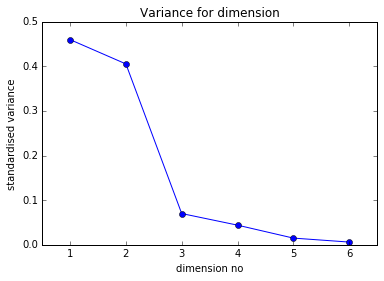

In [30]:
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, '-o')
plt.xlabel('dimension no')
plt.ylabel('standardised variance')
plt.title('Variance for dimension')
plt.xlim(xmin=0.5, xmax=6.5)
plt.grid = True
plt.show()

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: The variance of the first 2 dimensions is high and drops off quickly for the third dimension as shown in the graph above. Because of this I would select the first 2 dimensions to use with PCA

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: The dimensions represent features with the highest variance. The graph is clearly shoing that there are 2 features that have more variance than the others, which could indicate they hold more information

### ICA

In [95]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
ica = FastICA()
ica.fit(data)

# Print the independent components
print ica.components_

[[  1.52720371e-07   9.84997261e-06  -5.79847585e-06  -3.66134764e-07
    3.27774842e-06  -6.06356696e-06]
 [ -2.12004732e-07   1.89457791e-06  -6.33488671e-06  -4.22677136e-07
    6.01633611e-07   1.41514429e-06]
 [ -3.97571461e-06   8.56730582e-07   6.14664264e-07   6.78346987e-07
   -2.03973311e-06   1.04901917e-06]
 [  3.86373396e-07   2.19508029e-07   6.01592036e-07   5.22138299e-07
   -5.10235249e-07  -1.80928903e-05]
 [ -8.65305480e-07  -1.40061658e-07   7.74223324e-07   1.11460349e-05
   -5.56882270e-07  -5.95250420e-06]
 [  3.01633475e-07  -2.28097543e-06  -1.21136527e-05   1.45952515e-06
    2.82177031e-05   5.73229646e-06]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 

## Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

### Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [118]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [119]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca2 = PCA(n_components=2)
pca2.fit(data)
reduced_data = pca2.transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [130]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
#clusters = KMeans(n_clusters=8)
clusters = GMM(n_components=2)
clusters.fit(reduced_data)
print clusters

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)


In [131]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [132]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters.centroids
print centroids

AttributeError: 'GMM' object has no attribute 'centroids'

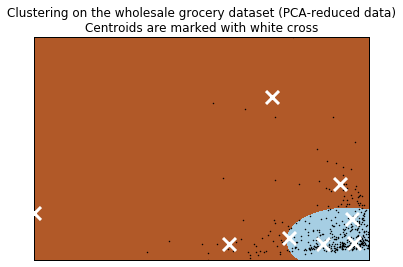

In [133]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 

### Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: 

**9)** How would you use that technique to help the company design new experiments?

Answer: 

**10)** How would you use that data to help you predict future customer needs?

Answer: 